本章我们学习一种常见的监督式机器学习算法，决策树。
# 算法简介
决策树是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，最后每个叶节点代表一种分类结果。在分类问题中，表示基于特征对实例进行分类的过程。学习时，利用训练数据，根据损失函数最小化的原则建立决策树模型；预测时，对新的数据，利用决策模型进行分类。
# 决策树模型

### 基本概念

学习过树形结构的同学应该能够比较好的理解决策树中的一些概念，可以跳过这一小节。
决策树所涉及到的概念包括：
1. 根结点：它表示整个样本集合，并且该节点可以进一步划分成两个或多个子集。
2. 拆分：表示将一个结点拆分成多个子集的过程。
3. 决策结点：当一个子结点进一步被拆分成多个子节点时，这个子节点就叫做决策结点。可以理解为做出选择
4. 叶子结点：无法再拆分的结点被称为叶子结点。在树结构中为底层节点
5. 剪枝：移除决策树中子结点的过程就叫做剪枝，跟拆分过程相反，常用于优化。
6. 分支/子树：一棵决策树的一部分就叫做分支或子树。
7. 父结点和子结点：一个结点被拆分成多个子节点，这个结点就叫做父节点；其拆分后的子结点也叫做子结点。（根节点也是父亲节点）
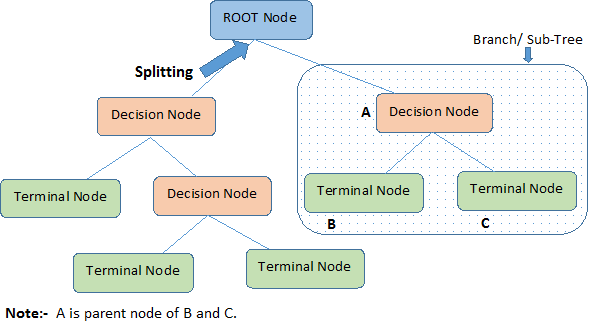

### 模型建立
#### 特征选择

把不同的特征作为决策的标准生成的决策树模型是不同的。一般而言，决策树的建立有三种方法:ID3, C4.5以及CART。其中，CART的分类效果一般优于其他两个方法。在本章中，我们会详细介绍这三种方法。

#### 决策树的生成

决策树通过选择的特征来评估标准，递归地进行生成子节点的过程，直到数据集不再可分。每一次数据集的划分，都希望各个子集的不确定性更小

#### 剪枝
对于过拟合的决策树模型，需要进行适当的剪枝，缩小树结构的规模。
### 模型优缺点

决策树的优点：
1. 具有可读性，如果给定一个模型，根据所产生的决策树很容易推理出相应的逻辑表达。
2. 分类速度快，能在相对短的时间内能够对大型数据源做出可行且效果良好的结果。
决策树的缺点：
1. 对**未知**的测试数据未必有好的分类能力，即可能发生过拟合现象，此时可采用剪枝或随机森林。（随机森林我们会在之后的文章中提到）

# ID3算法

由信息增益的原理来进行决策对于一组数据，熵越小，代表分类实现效果越好。
### 信息增益
熵是随机变量不确定性的度量，也就是熵越大，则随机变量的不确定性越大，熵越小，则随机变量的不确定性越小。其数学定义如下：
假设X是取得有限个值的离散随机变量，那么它的概率分布为
图片
它的熵为
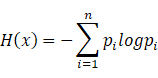
条件熵H(Y|X)表示在已知随机变量X的条件下，随机变量Y的**不确定性**。随机变量X给定的条件下随机变量Y的条件熵H(Y|X)，定义为X给定条件下Y的条件概率分布的熵对X的数学期望：
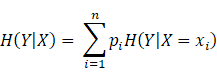
信息增益表示由于得知特征A的信息后的数据集D的分类不确定性减少的程度，定义为：
图片
# C4.5算法
### 算法简介
通过对ID3的学习，可以知道ID3存在一个问题，那就是越细小的分割分类错误率越小，所以ID3会越分越细。C4.5算法与ID3相似，但做了一些改进，即通过信息增益比来作为选择特征的标准。
### 信息增益比
特征A对训练数据集D的信息增益比GainRatio(D,A)定义为其信息增益Gain(D,A)与训练数据集D的经验熵H(D)之比，即
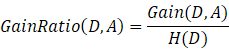
# CART算法
### 算法简介
CART也被成为回归分类树，它是一个二叉树。所以CART只能将一个父节点分成两个子节点，这里通过Gini指数来决定如何分裂。
### Gini指数
总体内包含的类别越杂乱，Gini指数越大。在分类问题中，假设有k个类，样本点属于第k类的概率为Pk，则概率分布的Gini指数定义为：
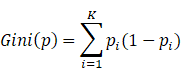
由于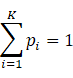我们可以得到简化公式：
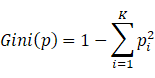
样本集合D中的基尼系数：
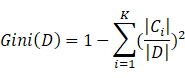
值得一提的是，CART是一个二叉树，当时用某个特征划分集合样本时只有两个集合：
1.等于给定的特征值的样本集合D1
2.不等于给定的特征值的样本集合D2
所以样本集合D可以划分为两个子集：
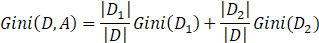
# 代码实现
接下来我们将介绍基于sklearn的决策树代码实现。

In [1]:
# 数据导入与切分
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
Y = iris.target

针对不同算法的决策树构建，我们需要调整DecisionTreeClassifier中的参数。以criterion为例，entropy代表通过信息熵对节点做分化，gini代表通过Gini指数对节点做分化。

In [3]:
DST = DecisionTreeClassifier(criterion='entropy')# 信息熵
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
DST.fit(x_train,y_train)
from sklearn import metrics
pred = DST.predict(x_test)
accuracy = metrics.accuracy_score(y_test,pred)
print("The accuracy is %.3f"% accuracy)

# 作业
使用sklearn提供的决策树模型对手写数字数据集的数据进行预测。手写数字数据集使用方法如下:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

# 参考来源

1. [https://shuwoom.com/?p=1452](https://shuwoom.com/?p=1452)
2. 《机器学习实战》Peter Harringto[ml](https://www.cnblogs.com/muzixi/p/6566803.html)